<a href="https://colab.research.google.com/github/jsuj1th/Colab/blob/main/DL/Assignments/DL_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regulariations mentioned in the codebook are
L1, L2,L1-L2, dropout

In [1]:
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
label_1=[i for i, label in enumerate(train_labels) if label == 1]
label_2=[i for i, label in enumerate(train_labels) if label == 2]
label_3=[i for i, label in enumerate(train_labels) if label == 3]
label_4=[i for i, label in enumerate(train_labels) if label == 4]
label_5=[i for i, label in enumerate(train_labels) if label == 5]
label_6=[i for i, label in enumerate(train_labels) if label == 6]
label_7=[i for i, label in enumerate(train_labels) if label == 7]
label_8=[i for i, label in enumerate(train_labels) if label == 8]
label_9=[i for i, label in enumerate(train_labels) if label == 9]
label_0=[i for i, label in enumerate(train_labels) if label == 0]
labels = [label_0, label_1, label_2, label_3, label_4, label_5, label_6, label_7, label_8, label_9]
pair_list=[]
for i in range(0,10,2):
  # print(i, i+1, "\n")
  pair=list(zip(labels[i],labels[i+1]))
  pair_list.append(pair)



In [3]:
combined_imgs=[]
i=0

for pairs in pair_list:
  for pair in pairs:
    img_1=train_images[pair[0]]
    img_2=train_images[pair[1]]
    combined_img=(img_1+img_2)/2
    combined_imgs.append((combined_img,i))

  i+=1
  # print(i)
    # plt.imshow(combined_img, cmap='gray')
    # plt.show()


AxesImage(shape=(28, 28))


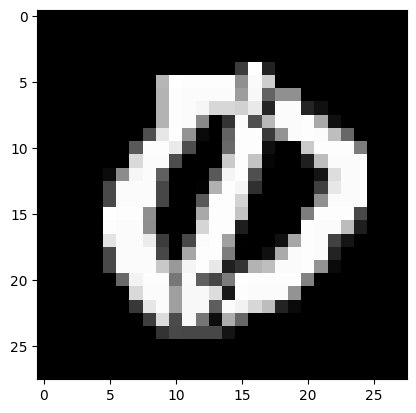

0


In [4]:


# plt.imshow(conv_label_1[5], cmap='gray')
# plt.show()
conv_label=5000
print(plt.imshow(combined_imgs[conv_label][0], cmap='gray'))
plt.show()
print(  combined_imgs[conv_label][1])


Label 0:


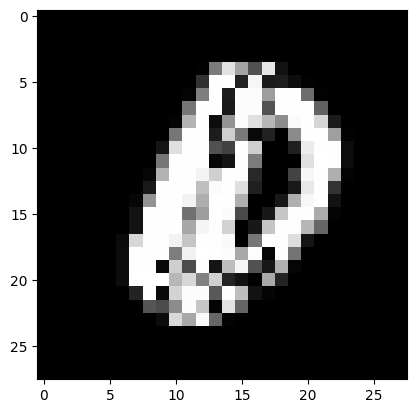

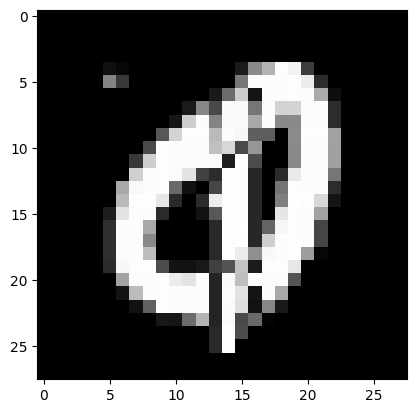

Label 1:


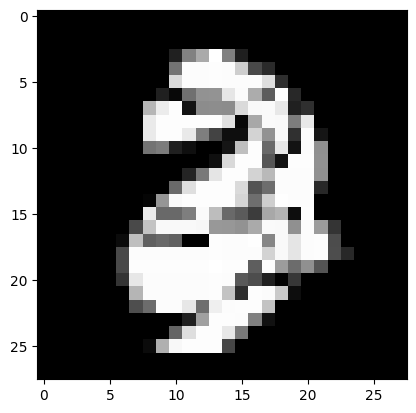

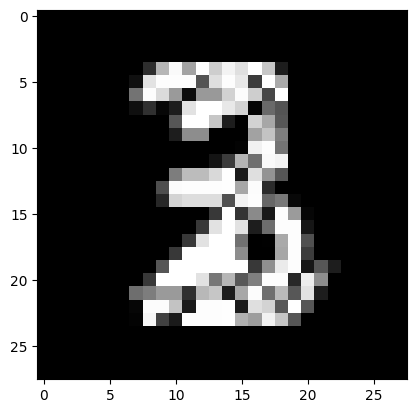

Label 2:


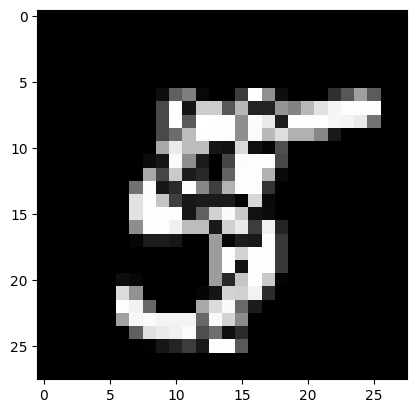

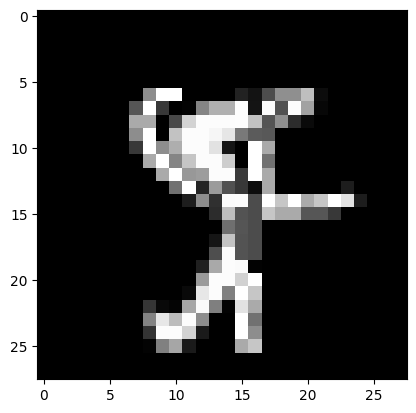

Label 3:


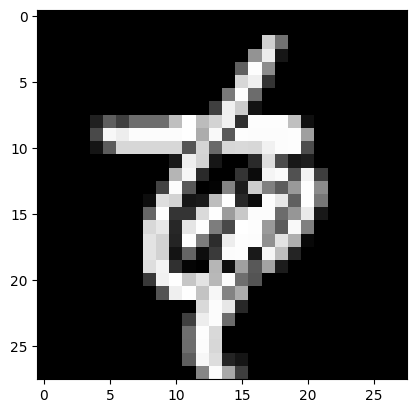

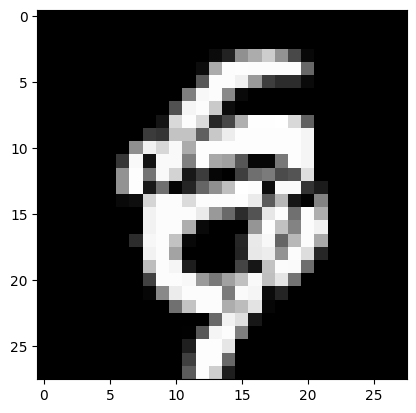

Label 4:


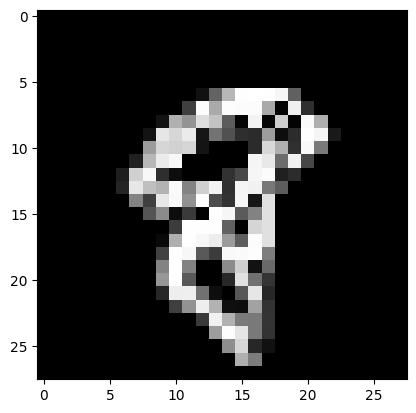

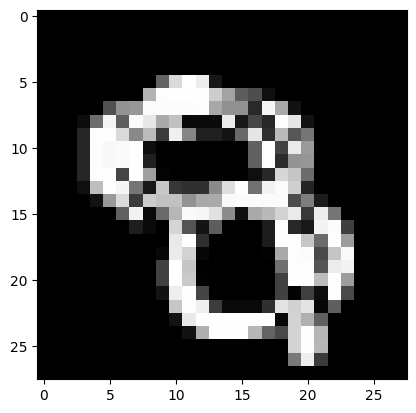

In [5]:
label_groups = {}
import random
for combined_img, label_index in combined_imgs:
    if label_index not in label_groups:
        label_groups[label_index] = []
    label_groups[label_index].append(combined_img)
selected_images = {}
for label_index, images in label_groups.items():
    selected_images[label_index] = random.sample(images, min(2, len(images)))
for label_index, images in selected_images.items():
    print(f"Label {label_index}:")
    for i, img in enumerate(images):
        plt.imshow(img, cmap='gray')
        plt.show()

In [21]:
# (train_data, train_labels)=combined_imgs
train_data=[]
train_labels=[]
for i in combined_imgs:
  train_data.append(i[0])
  train_labels.append(i[1])
train_data=np.array(train_data)
train_data=train_data.reshape((29071, 28 * 28))
train_labels=np.array(train_labels).reshape(29071,-1)
num_classes = 5
train_labels_onehot = to_categorical(train_labels, num_classes)
print(train_data.shape)
print(train_labels.shape)

(29071, 784)
(29071, 1)


In [25]:
# model = keras.Sequential([
#         layers.Dense(512, activation="relu"),
#         layers.Dense(5, activation="softmax")
#     ])
# model.compile(optimizer="rmsprop",
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])
# model.fit(
#     train_data, train_labels,
#     epochs=20, batch_size=512, validation_split=0.4)




# from tensorflow.keras import layers, models, optimizers

# Define the model
from tensorflow.keras.regularizers import l1_l2

# Regularized model
model = models.Sequential([
    layers.Dense(128, activation="relu",
                 kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    layers.Dropout(0.2),
    layers.Dense(5, activation="softmax")
])


# Compile the model with RMSprop optimizer
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
model.fit(train_data, train_labels,
          epochs=20, batch_size=128, validation_split=0.4)


Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7891 - loss: 41.8221 - val_accuracy: 0.1361 - val_loss: 50.7198
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9227 - loss: 10.0708 - val_accuracy: 0.0827 - val_loss: 42.8729
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9185 - loss: 6.1505 - val_accuracy: 0.2895 - val_loss: 28.4630
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9265 - loss: 4.9368 - val_accuracy: 0.2499 - val_loss: 45.2776
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9235 - loss: 4.3186 - val_accuracy: 0.1224 - val_loss: 35.6167
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9323 - loss: 3.3480 - val_accuracy: 0.0558 - val_loss: 37.8463
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9305 - loss: 3.2615 - val_accuracy: 0.2161 - val_loss: 48.2155
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9324 - loss: 3.0401 - val_ac